In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
# Cargar los datos desde el CSV generado en "23FeatureEngineering.ipynb"
merged_data = pd.read_csv('data2_eng.csv', low_memory=False)


In [5]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,State,Year,Month,Day,IsWeekend,AvgSales,AvgSalesStoreType,AvgCustomers,AvgCustomersStoreType
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,"Jan,Apr,Jul,Oct",HE,2015,7,31,0,3945.704883,5723.629246,467.646497,673.265894
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",TH,2015,7,31,0,4122.991507,5738.179710,486.045648,659.034880
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",NW,2015,7,31,0,5741.253715,5738.179710,620.286624,659.034880
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,"Jan,Apr,Jul,Oct",BE,2015,7,31,0,8021.769639,5723.629246,1100.057325,673.265894
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",SN,2015,7,31,0,3867.110403,5738.179710,444.360934,659.034880


Training RandomForest: 100%|██████████| 1/1 [04:09<00:00, 249.36s/it]


RMSE: 140.41


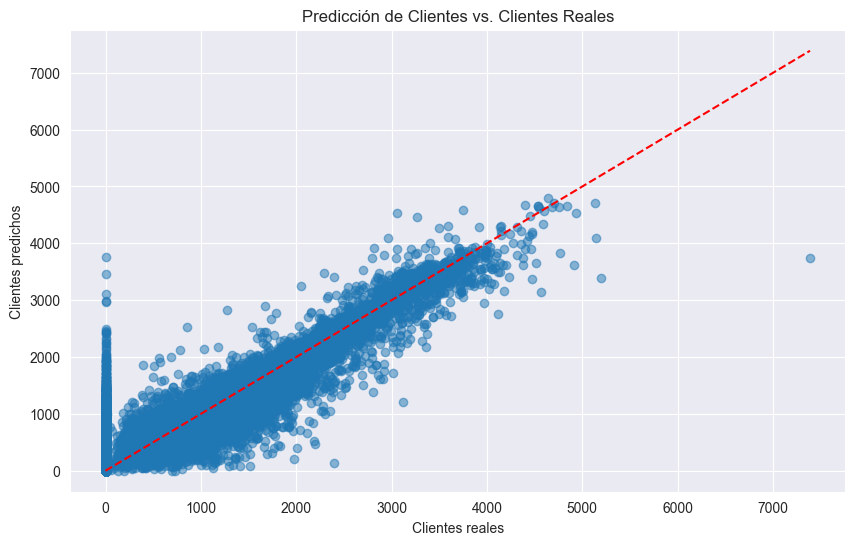

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Cargar los datos desde el CSV generado en "23FeatureEngineering.ipynb"
merged_data = pd.read_csv('data2_eng.csv', low_memory=False)

# Convertir todas las columnas a numéricas, forzando errores a NaN
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Llenar los valores NaN con la mediana de cada columna
merged_data.fillna(merged_data.median(), inplace=True)

# Definir las características y el objetivo para el modelo de regresión
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
            'Promo2', 'Month', 'Year', 'Day', 'StoreType', 'Assortment',
            'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State']
X = merged_data[features]
y = merged_data['Customers']  # Predecir el número de clientes

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión con barra de progreso
regressor = RandomForestRegressor(random_state=42)
for _ in tqdm(range(1), desc="Training RandomForest"):
    regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Clientes reales')
plt.ylabel('Clientes predichos')
plt.title('Predicción de Clientes vs. Clientes Reales')
plt.show()


In [ ]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Clientes reales')
plt.ylabel('Clientes predichos')
plt.title('Predicción de Clientes vs. Clientes Reales')
plt.show()

In [ ]:
# Guardar el DataFrame limpio como un nuevo archivo CSV
merged_data.to_csv('merged_data3.csv', index=False)